In [5]:
!pip list --user

Package                   Version
------------------------- --------------------
absl-py                   1.4.0
aiofiles                  22.1.0
aiosqlite                 0.19.0
anyio                     3.7.1
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
astroid                   2.15.6
attrs                     23.1.0
autograd                  1.6.2
autopep8                  2.0.2
Babel                     2.12.1
beautifulsoup4            4.12.2
bleach                    6.0.0
cachetools                5.3.1
certifi                   2023.7.22
cffi                      1.15.1
chardet                   4.0.0
charset-normalizer        3.2.0
click                     8.1.7
contourpy                 1.1.0
cycler                    0.11.0
defusedxml                0.7.1
dill                      0.3.7
docstring-to-markdown     0.12
entrypoints               0.4
fastjsonschema            2.18.0
filelock                  3.12.2
flake8    

In [ ]:
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

# 生成一些随机数据
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 使用贝叶斯线性回归建模
with pm.Model() as model:
    # 定义参数的先验分布
    # 截距项的先验分布
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    # 斜率项的先验分布
    slope = pm.Normal('slope', mu=0, sigma=10)
    
    # 定义线性模型
    mu = intercept + slope * X
    
    # 定义观测值的分布
    # 观测值的后验分布
    y_obs = pm.Normal('y_obs', mu=mu, sigma=1, observed=y)
    
    # 运行贝叶斯推断
    trace = pm.sample(2000, tune=1000, cores=1)  # 采样2000个样本，其中前1000个为烧烤期，单核心计算

# 可视化参数后验分布
az.plot_trace(trace)
plt.show()

# 可视化参数的后验分布概率密度
az.plot_posterior(trace)
plt.show()


In [3]:
!pip uninstall pymc3

In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.01, epochs=1000, method='closed_form', reg=None, alpha=0.01):
        self.lr = lr  # 学习率
        self.epochs = epochs  # 迭代次数
        self.method = method  # 方法：'closed_form'闭式解，'gradient_descent'梯度下降
        self.theta = None  # 参数
        self.reg = reg  # 正则化方法：None（无罚项），'l1'（L1正则），'l2'（L2正则）
        self.alpha = alpha  # 正则化参数

    def fit(self, X, y):
        # 添加偏置项
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        if self.method == 'closed_form':
            # 闭式解
            if self.reg is None:
                # 无正则化
                self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
            elif self.reg == 'l1':
                # L1正则化（Lasso）
                L = np.eye(X_b.shape[1])
                L[0, 0] = 0  # 不对偏置项进行惩罚
                self.theta = np.linalg.inv(X_b.T.dot(X_b) + self.alpha * L).dot(X_b.T).dot(y)
            elif self.reg == 'l2':
                # L2正则化（Ridge）
                self.theta = np.linalg.inv(X_b.T.dot(X_b) + self.alpha * np.eye(X_b.shape[1])).dot(X_b.T).dot(y)
        elif self.method == 'gradient_descent':
            # 初始化参数
            self.theta = np.random.randn(X_b.shape[1], 1)
            # 梯度下降
            for _ in range(self.epochs):
                gradients = 2 / len(X_b) * X_b.T.dot(X_b.dot(self.theta) - y)
                if self.reg == 'l1':
                    # L1正则化（Lasso）
                    gradients[1:] += self.alpha * np.sign(self.theta[1:])
                elif self.reg == 'l2':
                    # L2正则化（Ridge）
                    gradients[1:] += 2 * self.alpha * self.theta[1:]
                self.theta -= self.lr * gradients
        else:
            raise ValueError("Unsupported method. Choose 'closed_form' or 'gradient_descent'.")

    def predict(self, X):
        # 添加偏置项
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)


# 生成一些随机数据
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 实例化并拟合模型
# 无罚项（普通线性回归）
lin_reg_no_penalty = LinearRegression(method='closed_form')
lin_reg_no_penalty.fit(X, y)
print("No penalty (OLS) parameters:", lin_reg_no_penalty.theta.ravel())

# L1正则化（Lasso）
lin_reg_l1 = LinearRegression(method='closed_form', reg='l1', alpha=0.1)
lin_reg_l1.fit(X, y)
print("L1 penalty (Lasso) parameters:", lin_reg_l1.theta.ravel())

# L2正则化（Ridge）
lin_reg_l2 = LinearRegression(method='closed_form', reg='l2', alpha=0.1)
lin_reg_l2.fit(X, y)
print("L2 penalty (Ridge) parameters:", lin_reg_l2.theta.ravel())


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LinearRegression:
    def __init__(self, lr=0.01, epochs=1000, method='closed_form'):
        self.lr = lr  # Learning rate
        self.epochs = epochs  # Number of epochs
        self.method = method  # Method: 'closed_form' or 'gradient_descent'
        self.theta = None  # Parameters
        self.loss_history = []  # Loss record

    def fit(self, X, y):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        if self.method == 'closed_form':
            # Closed-form solution
            self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        elif self.method == 'gradient_descent':
            # Initialize parameters
            self.theta = np.random.randn(X_b.shape[1], 1)
            # Gradient descent
            for _ in range(self.epochs):
                gradients = 2 / len(X_b) * X_b.T.dot(X_b.dot(self.theta) - y)
                self.theta -= self.lr * gradients
                # Record loss
                loss = np.mean((X_b.dot(self.theta) - y) ** 2)
                self.loss_history.append(loss)
        else:
            raise ValueError("Unsupported method. Choose 'closed_form' or 'gradient_descent'.")

    def predict(self, X):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)


# Generate some random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Instantiate and fit the models
# Closed-form solution
lin_reg_closed_form = LinearRegression(method='closed_form')
lin_reg_closed_form.fit(X, y)

# Gradient descent
lin_reg_gradient_descent = LinearRegression(method='gradient_descent', lr=0.01, epochs=1000)
lin_reg_gradient_descent.fit(X, y)

# Visualize data and fitted models
plt.figure(figsize=(10, 5))

# Scatter plot of original data
plt.scatter(X, y, color='blue', label='Original data')

# Fitted lines for closed-form solution and gradient descent
plt.plot(X, lin_reg_closed_form.predict(X), color='green', label='Closed-form solution')
plt.plot(X, lin_reg_gradient_descent.predict(X), color='red', label='Gradient descent')

plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss change during gradient descent
plt.figure(figsize=(8, 5))
plt.plot(range(len(lin_reg_gradient_descent.loss_history)), lin_reg_gradient_descent.loss_history)
plt.title('Gradient Descent Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
df = pd.DataFrame({'solution':['closed_form','gradient_descent']})
for p in zip(lin_reg_closed_form.theta.ravel(),lin_reg_gradient_descent.theta.ravel(),['w','b'])
    df[p[-1]] = p[:-1]
df

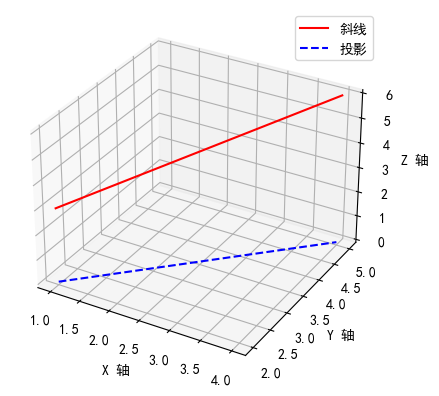

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 定义斜线的参数
point1 = np.array([1, 2, 3])  # 斜线的一个端点
point2 = np.array([4, 5, 6])  # 斜线的另一个端点

# 绘制斜线
ax.plot([point1[0], point2[0]], [point1[1], point2[1]], [point1[2], point2[2]], 'r-', label='斜线')

# 绘制斜线在XY平面上的投影
ax.plot([point1[0], point2[0]], [point1[1], point2[1]], [0, 0], 'b--', label='投影')

# 设置图形标签
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')

# 显示图例
ax.legend()

# 显示图形
plt.show()


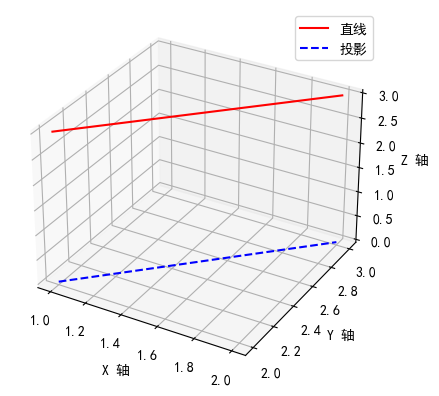

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 定义直线的参数
point = np.array([1, 2, 3])  # 直线上的点
direction = np.array([1, 1, 0])  # 直线的方向

# 计算直线的另一个点
point2 = point + direction

# 绘制直线
ax.plot([point[0], point2[0]], [point[1], point2[1]], [point[2], point2[2]], 'r-', label='直线')

# 绘制直线在XY平面上的投影
ax.plot([point[0], point2[0]], [point[1], point2[1]], [0, 0], 'b--', label='投影')

# 设置图形标签
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')

# 显示图例
ax.legend()

# 显示图形
plt.show()


AttributeError: 'Poly3DCollection' object has no attribute '_edgecolors2d'

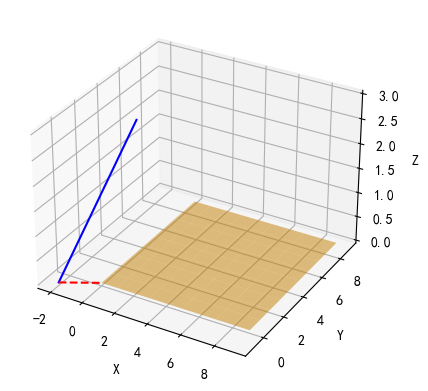

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义直线的参数
point  = np.array([1, 2, 3])  # 直线上的一点
direction = np.array([1, 1, 1])  # 直线的方向向量

# 定义水平面的参数
horizontal_plane_height = 0  # 水平面的高度

# 计算直线和水平面的交点
t = (horizontal_plane_height - point[2]) / direction[2]
intersection = point + t * direction

# 绘制直线和水平面
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制直线
ax.plot3D(*zip(point, intersection), color='blue', label='Line')

# 绘制水平面
xx, yy = np.meshgrid(range(10), range(10))
z = np.full_like(xx, horizontal_plane_height)
ax.plot_surface(xx, yy, z, alpha=0.5, color='orange', label='Horizontal Plane')

# 绘制投影线
ax.plot3D(*zip(intersection[:2], intersection[:2], [horizontal_plane_height]*2), linestyle='dashed', color='red', label='Projection')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 设置图例
ax.legend()

# 显示图形
plt.show()


AttributeError: 'Poly3DCollection' object has no attribute '_edgecolors2d'

/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

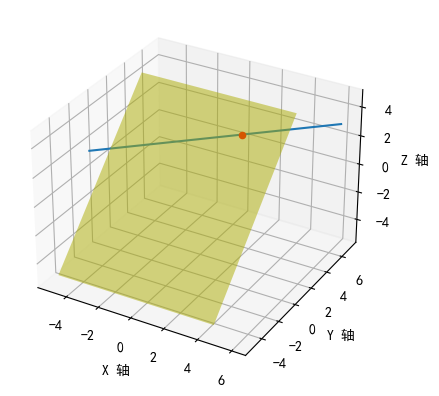

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 定义直线的参数
point = np.array([1, 2, 3])  # 直线上的点
direction = np.array([1, 1, 0])  # 直线的方向

# 定义斜面的参数
point_plane = np.array([0, 0, 0])  # 斜面上的点
normal_plane = np.array([0, 1, -1])  # 斜面的法向量

# 计算直线在斜面上的投影点
d = -point_plane.dot(normal_plane)
t = -(point.dot(normal_plane) + d) / direction.dot(normal_plane)
projection = point + t * direction

# 绘制直线
line = np.array([point + t * direction for t in np.linspace(-5, 5, 10)])
ax.plot(line[:, 0], line[:, 1], line[:, 2], label='直线')

# 绘制斜面
X, Y = np.meshgrid(np.arange(-5, 5, 0.5), np.arange(-5, 5, 0.5))
Z = (-normal_plane[0] * X - normal_plane[1] * Y - d) * 1. /normal_plane[2]
ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100, color='y', label='斜面')

# 绘制投影点
ax.scatter(*projection, color='r', label='投影点')

# 设置图形标签
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')

# 显示图例
ax.legend()

# 显示图形
plt.show()


AttributeError: 'Poly3DCollection' object has no attribute '_edgecolors2d'

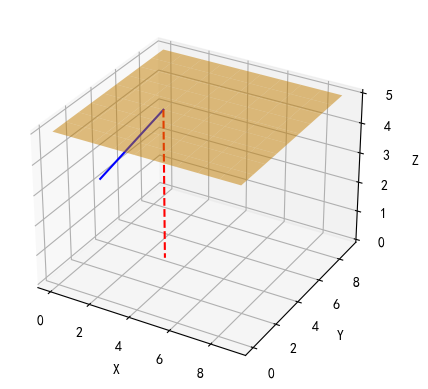

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义直线的参数
point  = np.array([1, 2, 3])  # 直线上的一点
direction = np.array([1, 1, 1])  # 直线的方向向量

# 定义斜面的参数
normal = np.array([0, 0, 1])  # 斜面的法向量
d = 5  # 斜面的截距

# 计算直线和斜面的交点
t = (d - np.dot(normal, point)) / np.dot(normal, direction)
intersection = point + t * direction

# 绘制直线和斜面
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制直线
ax.plot3D(*zip(point, intersection), color='blue', label='Line')

# 绘制斜面
xx, yy = np.meshgrid(range(10), range(10))
z = (-normal[0] * xx - normal[1] * yy + d) / normal[2]
ax.plot_surface(xx, yy, z, alpha=0.5, color='orange', label='Plane')

# 绘制投影线
ax.plot3D(*zip(intersection, [intersection[0], intersection[1], 0]), linestyle='dashed', color='red', label='Projection')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 设置图例
ax.legend()

# 显示图形
plt.show()


/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

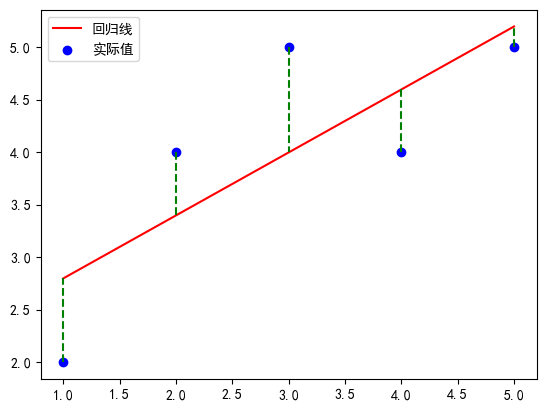

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# 示例数据
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2, 4, 5, 4, 5])

# 线性回归模型
model = LinearRegression()
model.fit(X, Y)

# 预测值
Y_pred = model.predict(X)

# 创建散点图
plt.scatter(X, Y, color='blue', label='实际值')

# 绘制线性回归线
plt.plot(X, Y_pred, color='red', label='回归线')

# 绘制Y值在X平面的投影
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y[i], Y_pred[i]], color='green', linestyle='dashed')

# 添加图例
plt.legend()

# 显示图形
plt.show()


/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

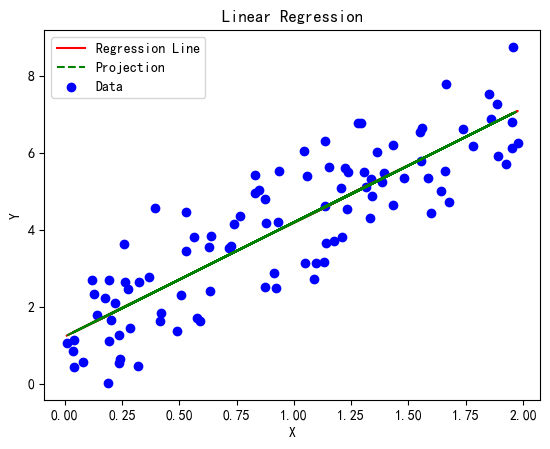

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 生成一些示例数据
np.random.seed(0)
x = 2 * np.random.rand(100, 1)
y = 3 * x + 1 + np.random.randn(100, 1)

# 执行线性回归
model = LinearRegression()
model.fit(x, y)

# 绘制数据散点图
plt.scatter(x, y, color='blue', label='Data')

# 绘制回归线
plt.plot(x, model.predict(x), color='red', label='Regression Line')

# 绘制y在x平面上的投影
plt.plot(x, model.predict(x), linestyle='dashed', color='green', label='Projection')

# 添加标签和标题
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()

# 显示图形
plt.show()


/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

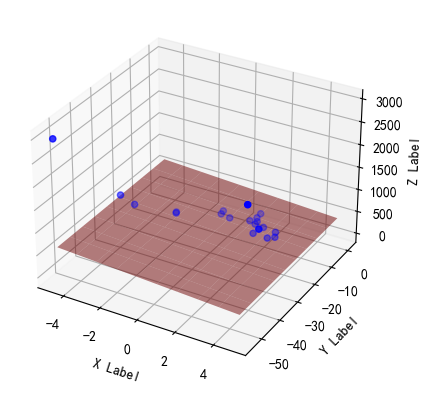

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# 生成随机数据
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 20)
Y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 20)

# 将数据转换为三维格式
X = X[:, np.newaxis]
Y = Y[:, np.newaxis]
Z = Y ** 2

# 创建3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 散点图
ax.scatter(X, Y, Z, color='b')

# 线性回归模型
model = LinearRegression()
model.fit(X, Z)
Z_pred = model.predict(X)

# 回归平面
X_surf, Y_surf = np.meshgrid(np.linspace(X.min(), X.max(), 10), np.linspace(Y.min(), Y.max(), 10))
Z_surf = model.coef_[0] * X_surf + model.intercept_
ax.plot_surface(X_surf, Y_surf, Z_surf, color='r', alpha=0.5)

# 设置图形标签
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 显示图形
plt.show()
